In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

01

In [2]:
# Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните 
# качество классификации по отложенной выборке.

In [3]:
def pca(x, n_components):
    covariance_matrix = x.T @ x
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    w = np.hstack([eig_pairs[i][1].reshape(4, 1) for i in range(n_components)])

    z = x.dot(w)
    
    return z

In [4]:
iris = load_iris()
X, Y = iris.data, iris.target

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.std()

1.0

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.3, random_state=42)

In [7]:
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X_train, Y_train)
score_wo_pca = clf.score(X_test, Y_test)
score_wo_pca

0.9777777777777777

In [8]:
X2 = pca(X_scaled, 3)

In [9]:
X_train2, X_test2, Y_train, Y_test = train_test_split(X2, Y, test_size=.3, random_state=42)

In [10]:
clf2 = RandomForestClassifier(max_depth=1, random_state=1)
clf2.fit(X_train2, Y_train)
score_w_pca = clf2.score(X_test2, Y_test)
score_w_pca

0.7777777777777778

Очевидно, применение метода главных компонтент в этой задаче нецелесообразно, так как ухудшает качество модели.

02

In [11]:
# Напишите свою реализацию метода главных компонент посредством сингулярного разложения с 
# использованием функции numpy.linalg.svd().

In [12]:
def my_own_pca(x, n_components):
    x = x - np.mean(x, axis=0)
    
    cov_matrix = np.cov(x.T)
    
    u, s, vh = np.linalg.svd(cov_matrix)
    
    idx = np.argsort(-s)
    u = u[:, idx]
    s = s[idx]
    
    u_reduced = u[:, :n_components]
    
    x_reduced = np.dot(x, u_reduced)
    
    return x_reduced

In [13]:
my_X = my_own_pca(X_scaled, 3)

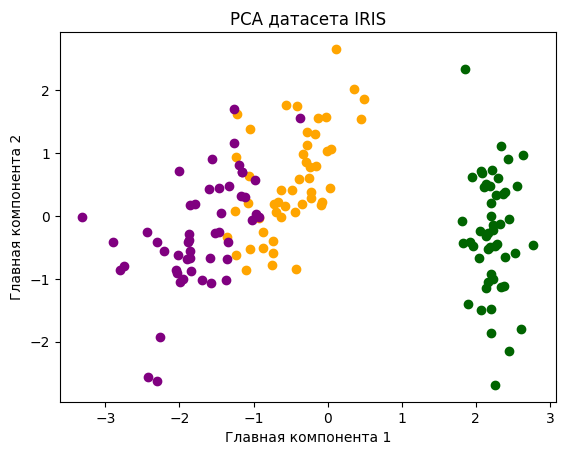

In [14]:
plt.figure()
for c, i in zip(['darkgreen', 'orange', 'purple'], [0, 1, 2]):
    plt.scatter(my_X[Y == i, 0], my_X[Y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()